# Customer Churn Analysis In Telecom Industry

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Inference:
* Mean or average monthly charges is USD 64.76, whereas 25% of the population(customers) are paying more than USD 89.85 monthly
* Max. tenure is 72 months, 75% customers are having tenure less than 55 months
* Senior Citizen column is irrelevant here, since it has only values 0(No) and 1(Yes)

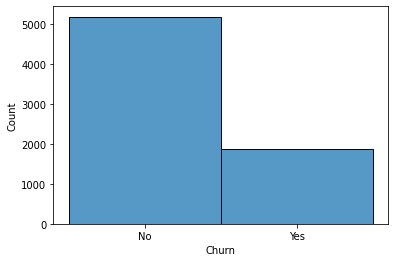

In [9]:
sns.histplot(df.Churn)

In [10]:
##percentage of churners vs non-churners
print(df.Churn.value_counts())
print('\n')
(df.Churn.value_counts()/ len(df.Churn)) *100

No     5174
Yes    1869
Name: Churn, dtype: int64




No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Inference:
The data in target label is highly imbalanced, the ratio is 73:27. We need to balance the data either by upscaling or downscaling. I will proceed with upscaling here.

In [11]:
##Missing data detection
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing Data - Initial Intuition
Here, we don't have any missing data.
General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Data Cleaning

In [12]:
##Total charges column looks to be numeric, let's convert it to numeric from object type
#Setting errors to 'coerce', so that invalid parsing will be set as NaN.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [13]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


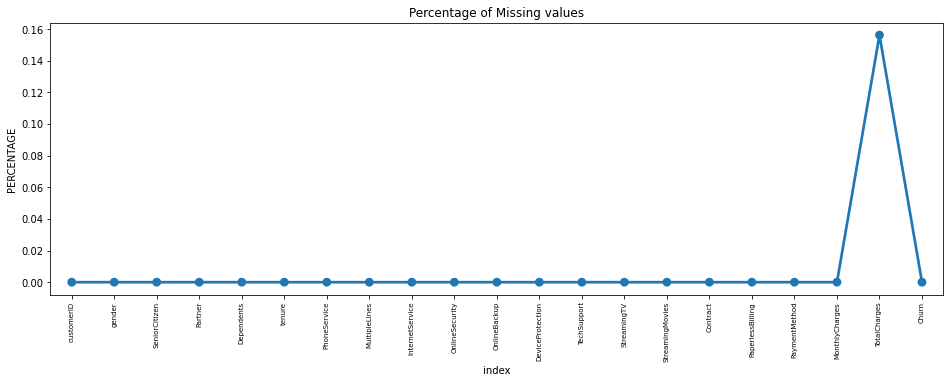

In [14]:
##Plot to check missing values 
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [15]:
##Since, the count of NaN values are very less, we can safely drop these 11 rows. 
df.dropna(axis=0, how='any', inplace=True)

In [16]:
##Checking the number of uniques values in each columns.
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [17]:
##Let's segregate tenure into multiple bins
#Use pandas 'cut' to segment and sort data values into bins.

# Group the tenure in bins of 12 months
labels = [f"{i} - {i+11}" for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)


In [18]:
df.tenure_group.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

In [19]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [20]:
##Let's drop the irrelevant columns
df.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


Data Exploration

1. Performing univariate analysis





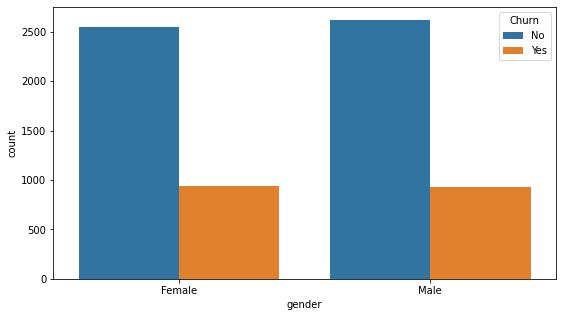

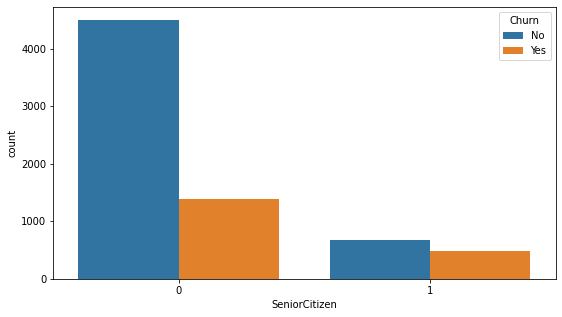

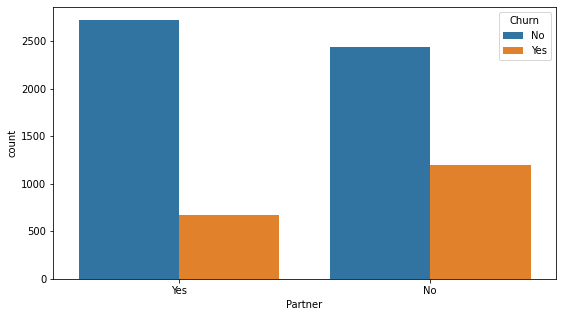

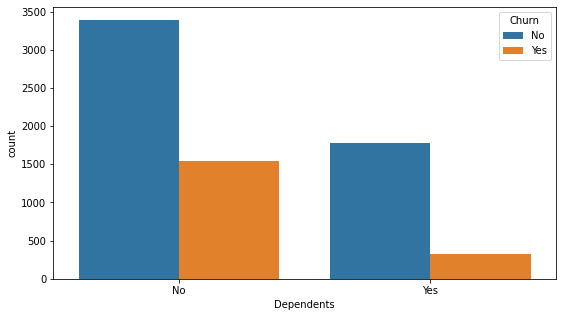

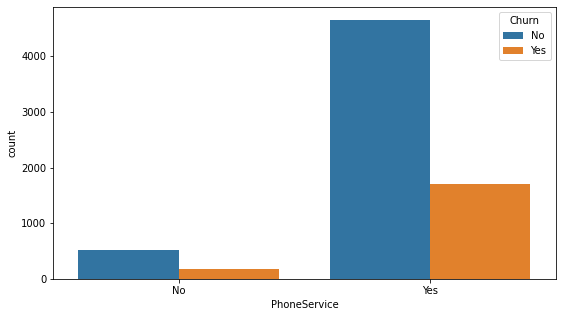

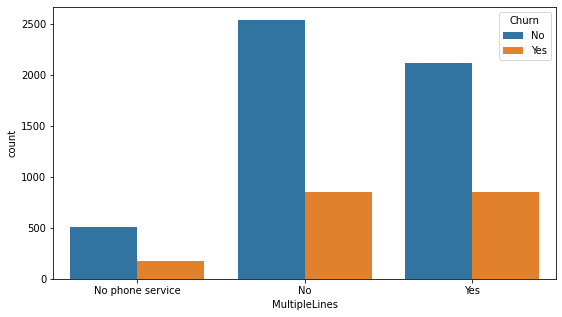

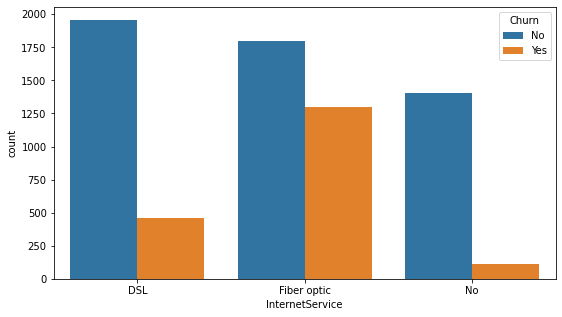

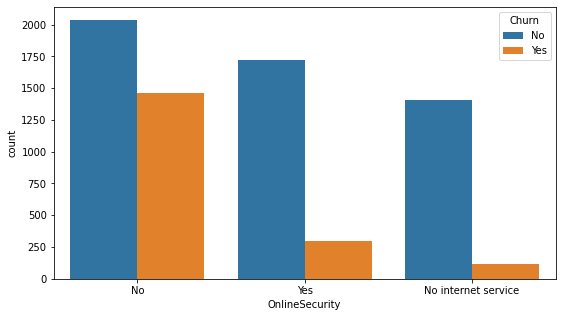

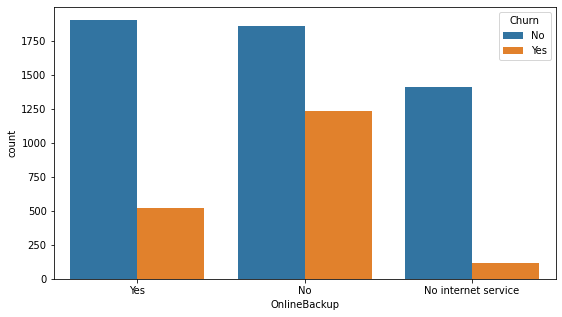

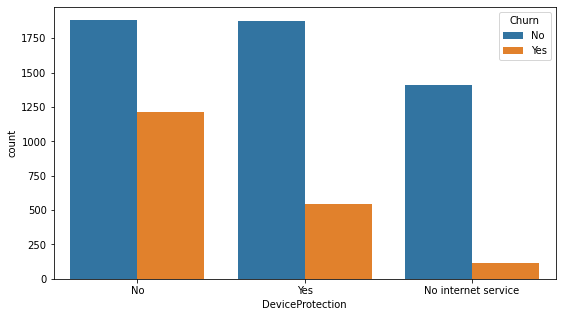

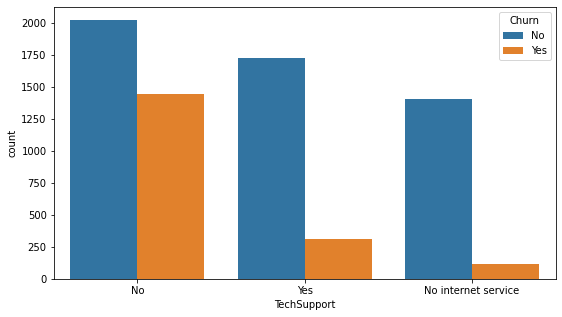

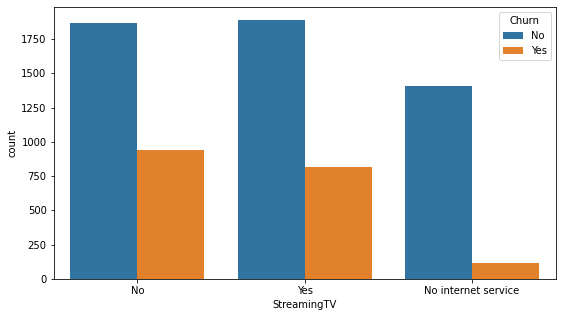

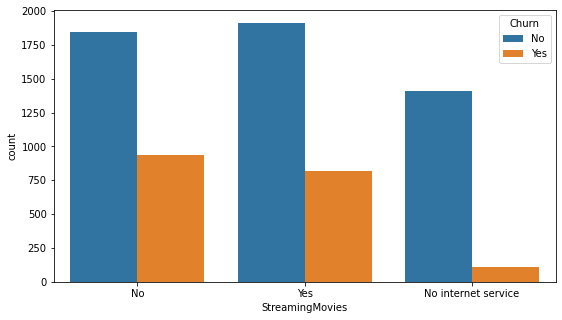

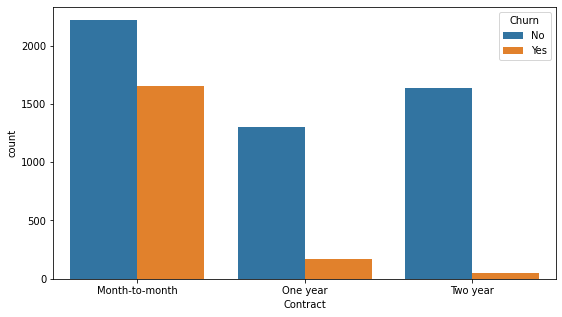

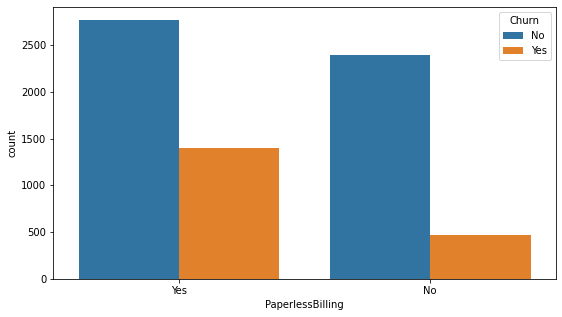

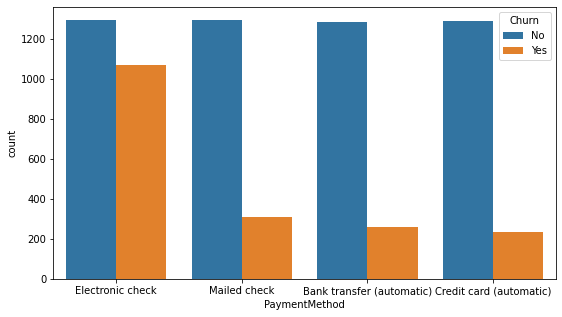

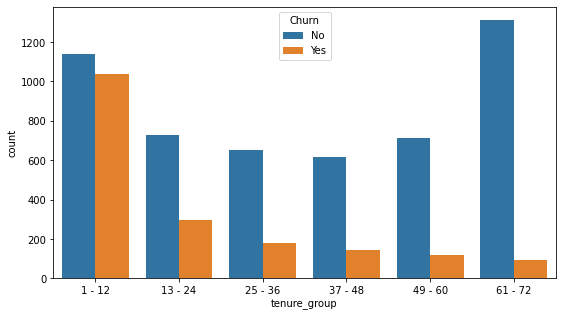

In [22]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i, figsize=(9,5))
    sns.countplot(data=df, x=predictor, hue='Churn')

2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [23]:
df.Churn = np.where(df.Churn=='Yes', 1, 0)

In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [25]:
##Add one-hot encoding for all the categorical columns
data = pd.get_dummies(df)
data.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


## Bivariate and multivariate analysis

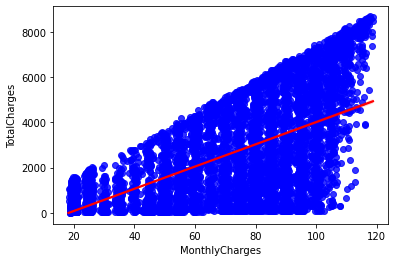

In [26]:
sns.regplot(data=df, x='MonthlyCharges', y='TotalCharges', scatter_kws={"color": "blue"}, line_kws={"color": "red"})

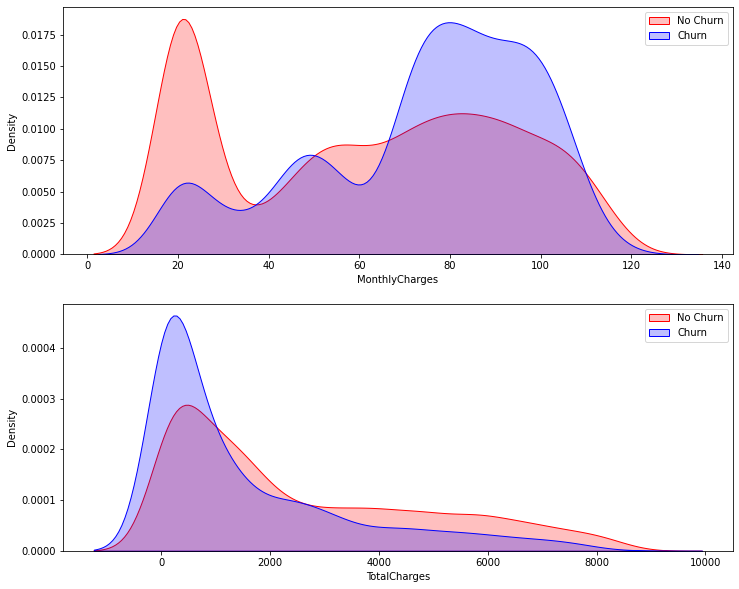

In [27]:
##Variation of Churn by Monthly Charges and Total Charges
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(12, 10)
monthly = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 0) ],
                color="Red", shade = True, ax=axes[0])
monthly = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 1) ],
                color="Blue", shade = True, ax=axes[0])
monthly.legend(["No Churn","Churn"],loc='upper right')

total = sns.kdeplot(data.TotalCharges[(data["Churn"] == 0) ],
                color="Red", shade = True, ax=axes[1])
total = sns.kdeplot(data.TotalCharges[(data["Churn"] == 1) ],
                color="Blue", shade = True, ax=axes[1])
total.legend(["No Churn","Churn"],loc='upper right')

Inference:

*   Higher churn is observed when monthly charges are higher, which is quite obvious.
*   But, churn is high at Low Total charges. This might be the result of Higher monthly charges and Less Tenure. 



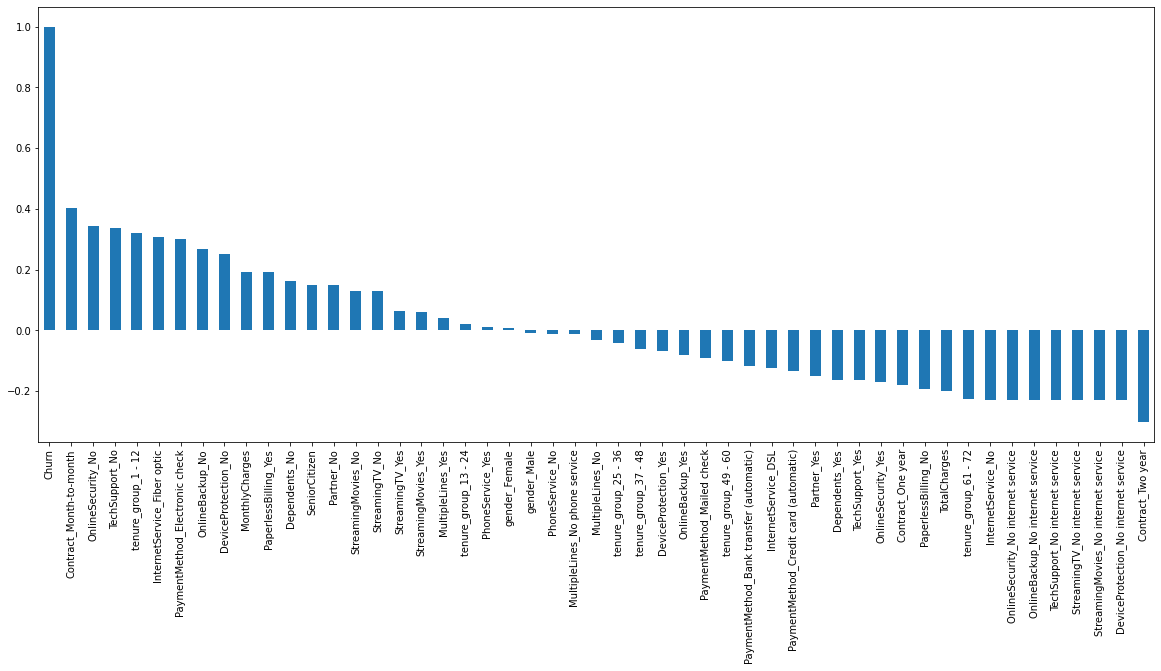

In [28]:
plt.figure(figsize=(20,8))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Derived Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


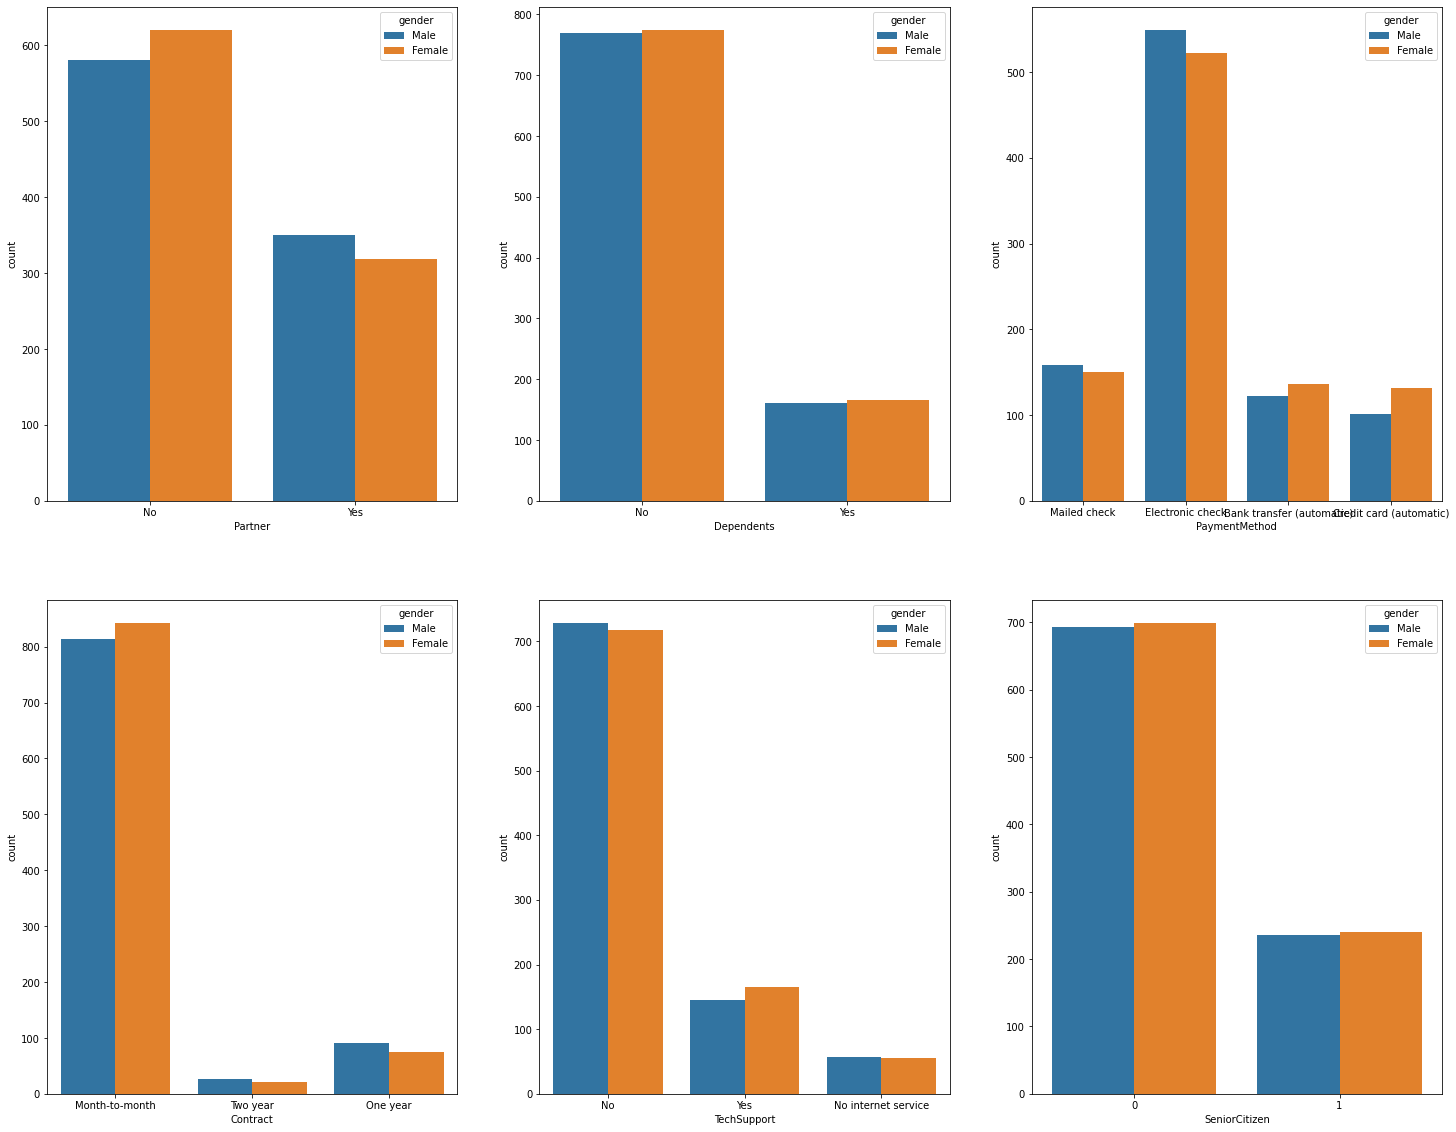

In [49]:
fig, axes = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches(25, 20)

sns.countplot(x='Partner', hue='gender',data=df.loc[df["Churn"]==1], ax=axes[0][0])
sns.countplot(x='Dependents', hue='gender',data=df.loc[df["Churn"]==1], ax=axes[0][1])
sns.countplot(x='PaymentMethod', hue='gender',data=df.loc[df["Churn"]==1], ax=axes[0][2])
sns.countplot(x='Contract', hue='gender',data=df.loc[df["Churn"]==1], ax=axes[1][0])
sns.countplot(x='TechSupport', hue='gender',data=df.loc[df["Churn"]==1], ax=axes[1][1])
sns.countplot(x='SeniorCitizen', hue='gender',data=df.loc[df["Churn"]==1], ax=axes[1][2])

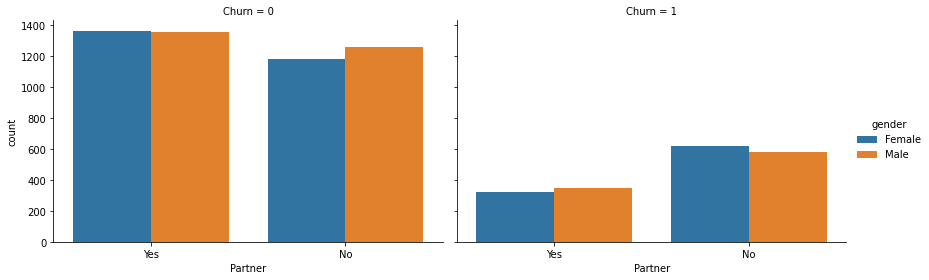

In [50]:
sns.catplot(x="Partner", hue="gender", col="Churn",
                data=df, kind="count",
                height=4, aspect=1.5);

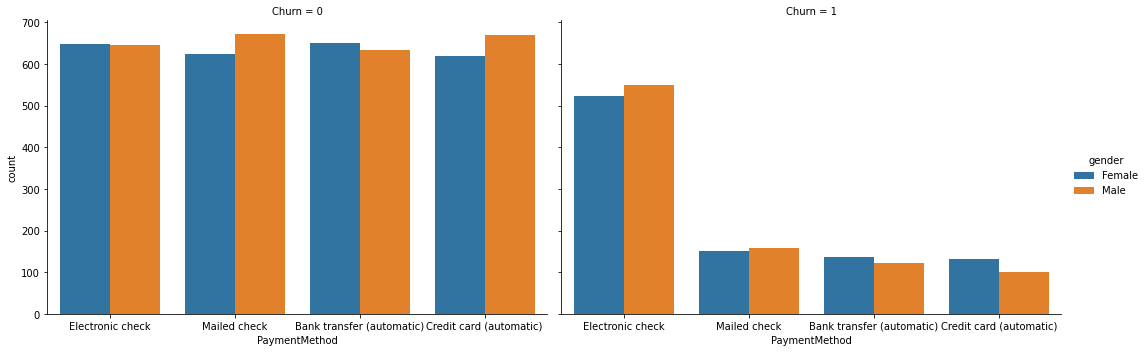

In [32]:
sns.catplot(x="PaymentMethod", hue="gender", col="Churn",
                data=df, kind="count",
                height=5, aspect=1.5);

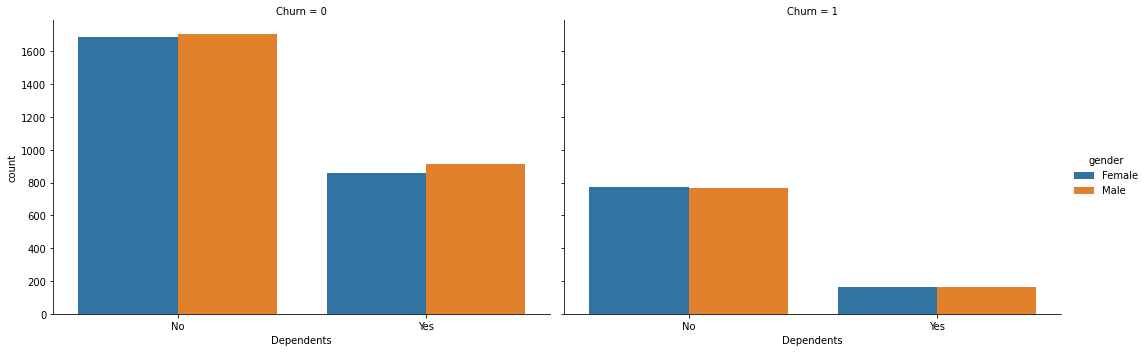

In [33]:
sns.catplot(x="Dependents", hue="gender", col="Churn",
                data=df, kind="count",
                height=5, aspect=1.5);

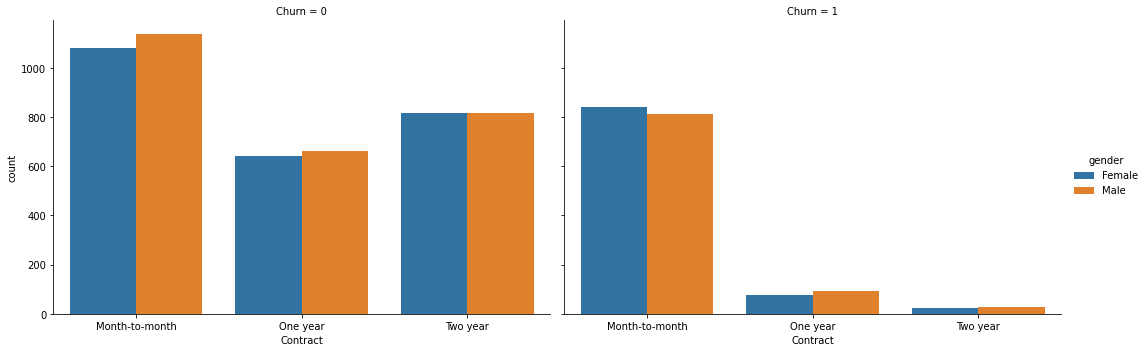

In [34]:
sns.catplot(x="Contract", hue="gender", col="Churn",
                data=df, kind="count",
                height=5, aspect=1.5);

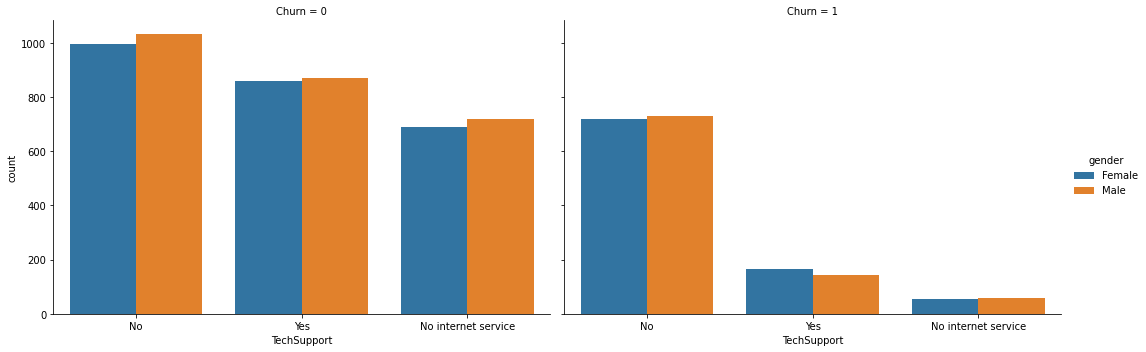

In [35]:
sns.catplot(x="TechSupport", hue="gender", col="Churn",
                data=df, kind="count",
                height=5, aspect=1.5);

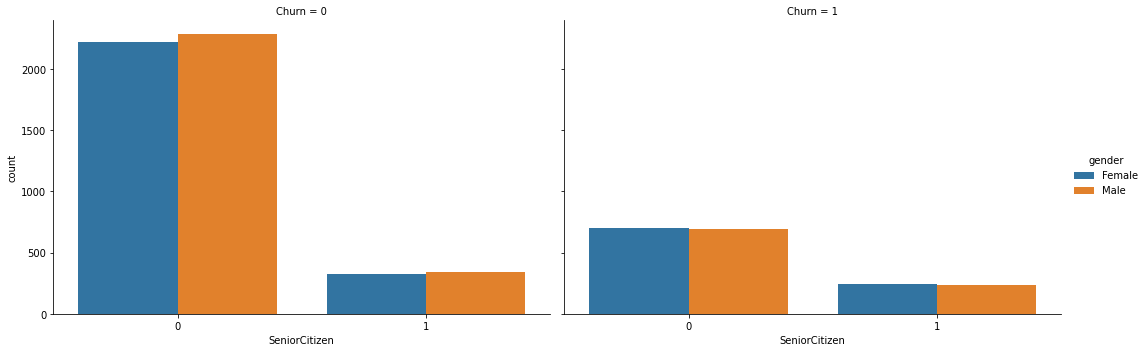

In [36]:
sns.catplot(x="SeniorCitizen", hue="gender", col="Churn",
                data=df, kind="count",
                height=5, aspect=1.5);

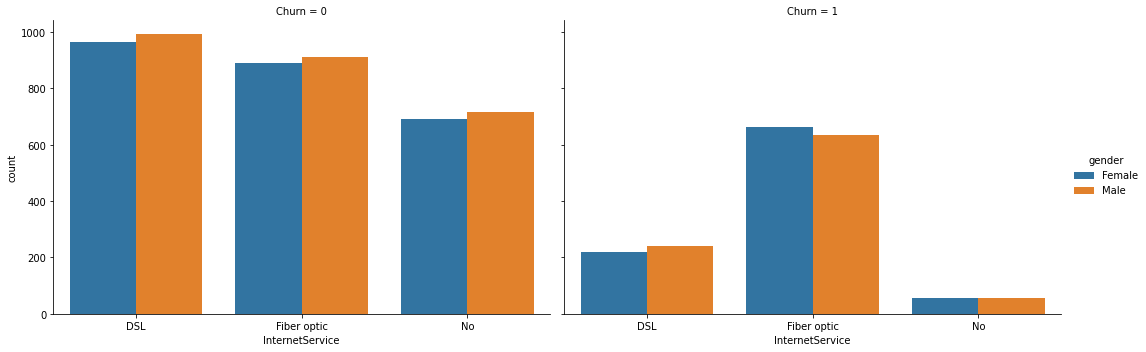

In [37]:
sns.catplot(x="InternetService", hue="gender", col="Churn",
                data=df, kind="count",
                height=5, aspect=1.5);

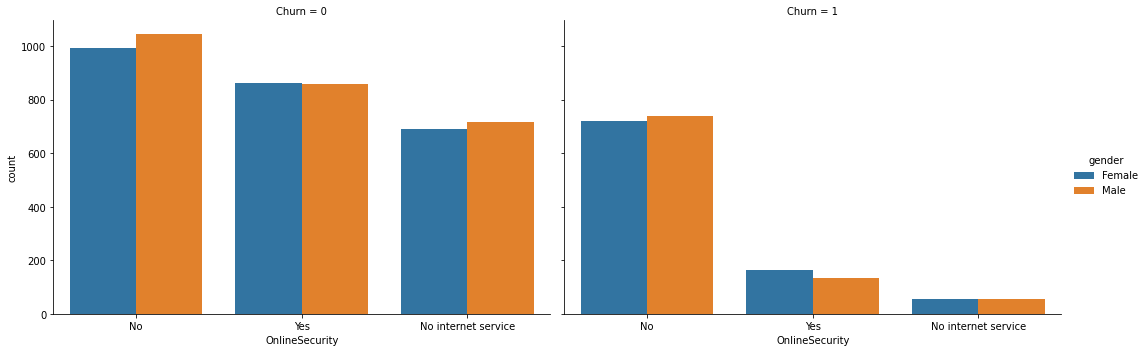

In [38]:
sns.catplot(x="OnlineSecurity", hue="gender", col="Churn",
                data=df, kind="count",
                height=5, aspect=1.5);

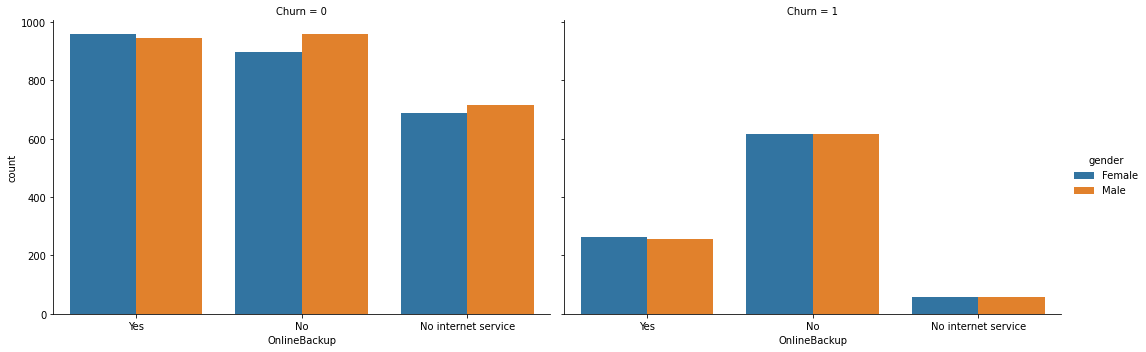

In [39]:
sns.catplot(x="OnlineBackup", hue="gender", col="Churn",
                data=df, kind="count",
                height=5, aspect=1.5);

Inference from the above plots:

* Higher churn with cutomers without partners
* People preferring Electronic check medium as payment method are the highest churners
* Cutomers on Monthly contract are more likely to churn.
* Cutomers with No Online security, No Tech Support, No Online backup category are high churners
* Non Senior Citizens are high churners when compared with Senior Citizens.
* As it is evident from the plots above, there is not much significant difference between genders in any of the aspects. 

In [52]:
data.to_csv('telco_churn_EDA.csv', index=False)
